# black-scholes option pricing demo

ever wondered how traders price european options in **microseconds**?

this notebook is the answer to your question!

this notebook brings the legendary **black–scholes model** to life in Python, clean, simple, and fully extendable

here’s what you’ll explore:  

1. compute **call and put prices** for european options  

2. visualize **option price vs stock price** 

3. explore the **volatility smile** 

4. compute and visualize **delta** (one of the greeks)   

now i'll let dive into the math and code and let you see the magic unfold! 🪄

In [6]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(),'..','src')))

import numpy as np
import matplotlib.pyplot as plt
from black_scholes import black_scholes_call, black_scholes_put
from scipy.stats import norm

In [9]:
# let's include the default parameters

S = 100      # current stock price
K = 100      # strike price
T = 1        # time to maturity inyears
r = 0.05     # risk-free interest rate
sigma = 0.2  # volatility

In [10]:
call_price = black_scholes_call(S, K, T, r, sigma)
put_price  = black_scholes_put(S, K, T, r, sigma)

print(f"Call Price: {call_price:.2f}")
print(f"Put Price:  {put_price:.2f}")

Call Price: 10.45
Put Price:  5.57


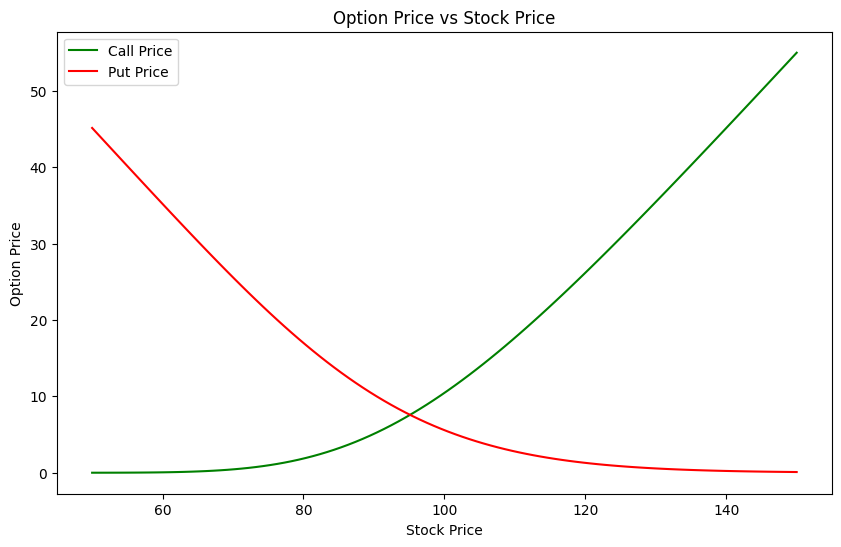

In [ ]:
# now let's visualize the option price vs stock price
S_range = np.linspace(50, 150, 100)

call_prices = [black_scholes_call(s, K, T, r, sigma) for s in S_range]
put_prices  = [black_scholes_put(s, K, T, r, sigma) for s in S_range]

plt.figure(figsize=(10,6))
plt.plot(S_range, call_prices, label='Call Price', color='green')
plt.plot(S_range, put_prices, label='Put Price', color='red')
plt.title('Option Price vs Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.show()

This plot shows how the **black–scholes price** of a european call and put option changes as the **underlying stock price** varies  

- **call Option (green curve):** price increases as the stock price rises
- **put Option (red curve):** price decreases as the stock price rises

intuition:  
- a call option becomes more valuable when the stock price is high (you can buy low, sell high)  
- a put option becomes more valuable when the stock price is low (you can sell high, buy low)  

this visualization helps you see the **sensitivity of option prices to the underlying asset**, which is one of the fundamental concepts in option pricing

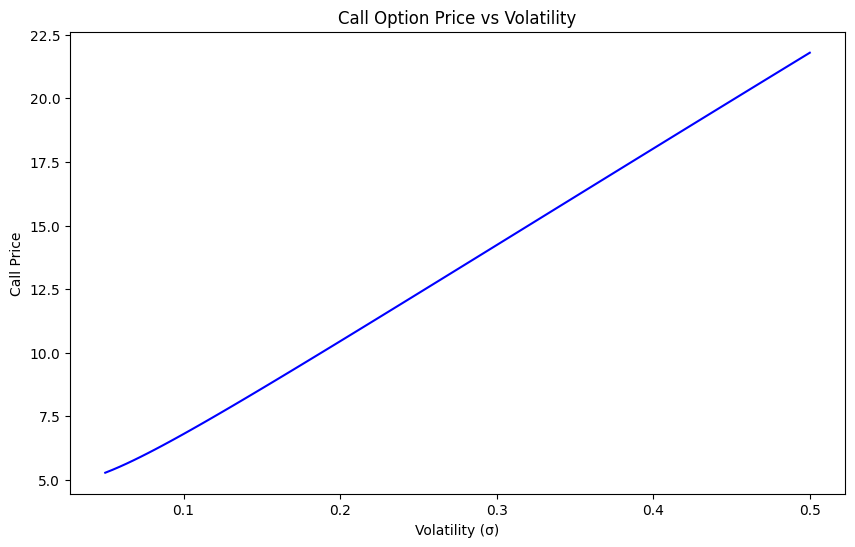

In [12]:
# now let's visualize the option price vs volatility
sigma_range = np.linspace(0.05, 0.5, 100)

call_prices_vol = [black_scholes_call(S, K, T, r, vol) for vol in sigma_range]

plt.figure(figsize=(10,6))
plt.plot(sigma_range, call_prices_vol, color='blue')
plt.title('Call Option Price vs Volatility')
plt.xlabel('Volatility (σ)')
plt.ylabel('Call Price')
plt.show()

this plot shows how the **call option price** changes as the **volatility** of the underlying asset varies

- as volatility increases, the **option price rises**  
- intuition: higher volatility means the stock price could swing more, increasing the chance the option ends up **in-the-money**  

this visualization captures the essence of the **volatility effect** in option pricing, sometimes referred to as the "volatility smile" when comparing multiple strikes

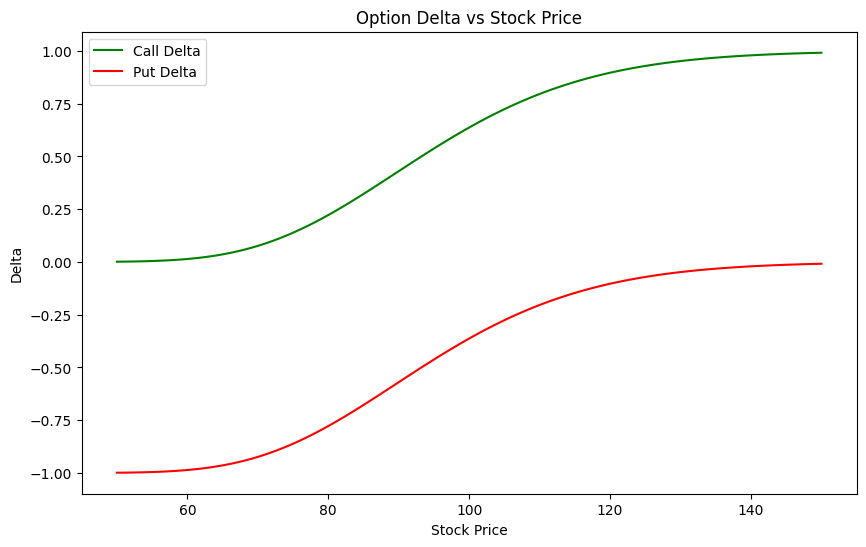

In [13]:
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    return delta_call(S, K, T, r, sigma) - 1

S_range = np.linspace(50, 150, 100)
delta_calls = [delta_call(s, K, T, r, sigma) for s in S_range]
delta_puts  = [delta_put(s, K, T, r, sigma) for s in S_range]

plt.figure(figsize=(10,6))
plt.plot(S_range, delta_calls, label='Call Delta', color='green')
plt.plot(S_range, delta_puts, label='Put Delta', color='red')
plt.title('Option Delta vs Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.show()

Delta (Δ) sensitivity to stock price

Delta measures how much the **option price changes** for a **small change in the underlying stock price**:

- **call Delta:** 0 → 1  
- **put Delta:** -1 → 0  

intuition:  
- a call option with delta 0.6 means that if the stock price rises by $1, the call price will increase by $0.60 
- Delta helps traders **hedge portfolios** and understand the option’s sensitivity to the underlying asset

## explore other Greeks

so far, you only looked at **Delta**, but there are many more **Greeks** you can explore:

- **Gamma (Γ):** Sensitivity of Delta to stock price  
- **Vega (ν):** Sensitivity to volatility  
- **Theta (θ):** Sensitivity to time decay  
- **Rho (ρ):** Sensitivity to interest rates  

how to explore another Greek in this notebook:

1. copy the **Delta code cell**  
2. replace the `delta_call` and `delta_put` functions with the formula for the Greek you want  
3. update the plot labels and title accordingly  
4. run the cell and voila, your new Greek visualization!  

feel free to experiment with different **stock prices, strikes, maturities, and volatilities** to see how each Greek behaves. the notebook is your sandbox 
go wild! 

## conclusion & next steps

congrats! you’ve just explored the **black–scholes model** in python 

here’s what we covered:  
- pricing **european call and put options**  
- visualizing **option price vs stock price**  
- exploring the **volatility effect (volatility smile)**  
- calculating and plotting **Delta**, one of the key Greeks  

next steps to level up your quant game:  
- implement and visualize other **Greeks**: Gamma, Vega, Theta, Rho  
- compare **black–scholes prices to monte carlo simulations**  
- explore **real market data** and implied volatility  
- build **option portfolios** and test hedging strategies  

this notebook is your **sandbox**, tweak parameters, add new Greeks, and see the magic of option pricing in action  

happy pricing! 💰🧮✨